Nombre d'elements :  15
Nombre de noeuds :  8
Axial Forces (positive = tension, negative = compression) :
 [[ 24.9936627 ]
 [ 15.05486106]
 [  4.476552  ]
 [-25.0063373 ]
 [-14.94513894]
 [ -5.523448  ]
 [  0.04852377]
 [ -0.46858694]
 [  4.476552  ]
 [  7.0800301 ]
 [ -7.06210552]
 [  6.99348255]
 [ -7.14865307]
 [  7.81133508]
 [ -6.33080055]]
Reaction forces (positive = upward, negative = downward) : 
 [[-30.          5.0063373]
 [ 30.          4.9936627]]
Deformation at nodes 
 [[  0.           0.        ]
 [  2.70201759  -4.22895932]
 [  4.32957014 -12.81281781]
 [  4.8135217  -23.26358172]
 [  0.           0.        ]
 [ -2.70338782  -4.23420514]
 [ -4.31907851 -12.76215976]
 [ -4.91620803 -23.74753328]]
1600


<ipython-input-2-2f5458fbe4e1>:237: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,6))


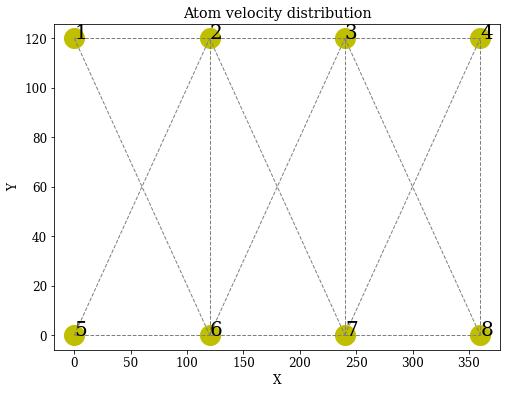

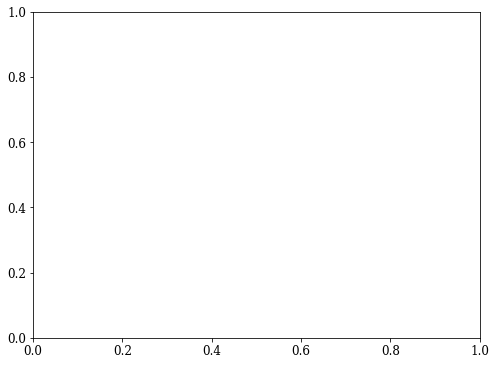

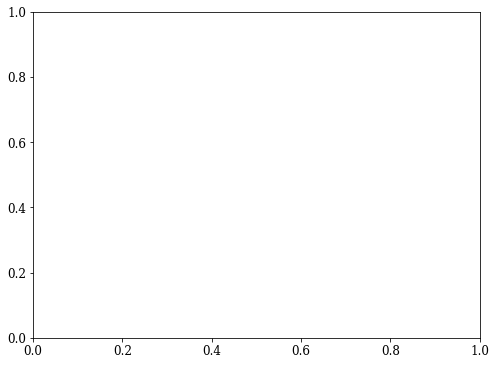

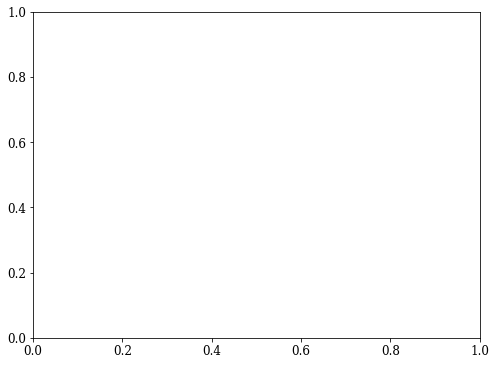

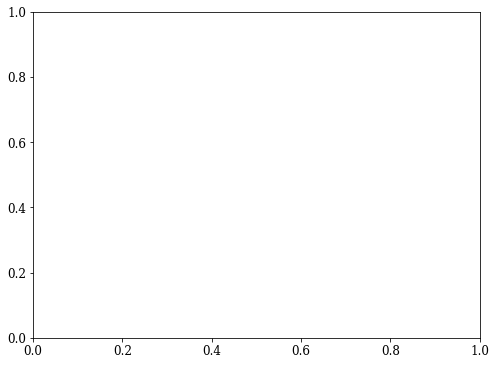

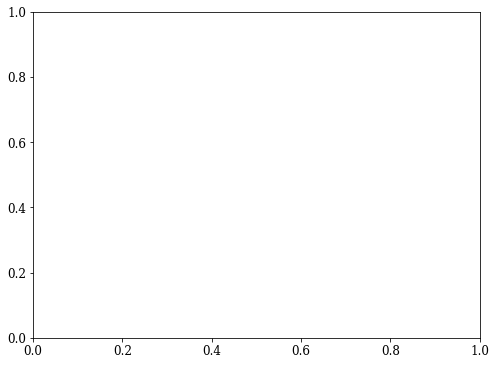

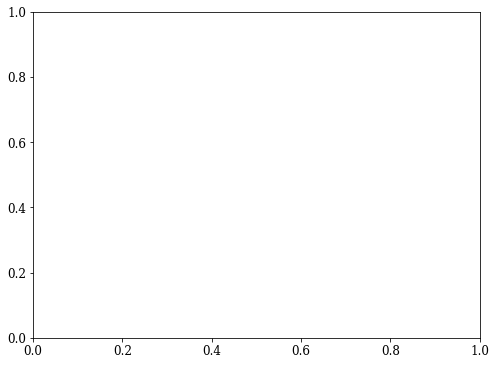

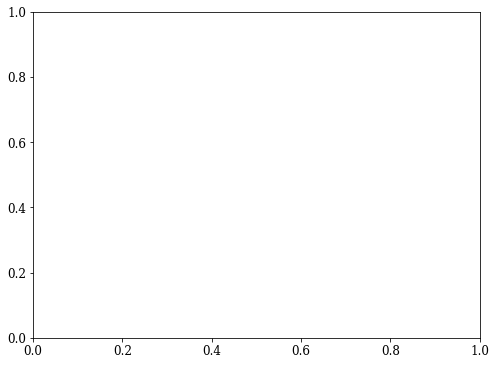

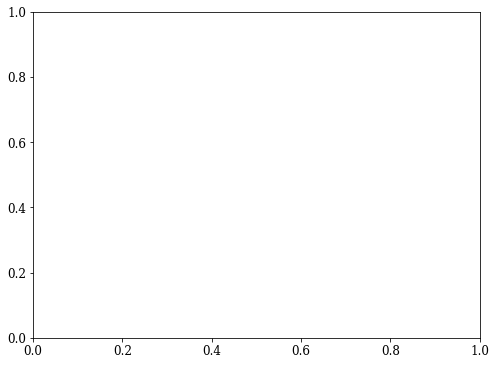

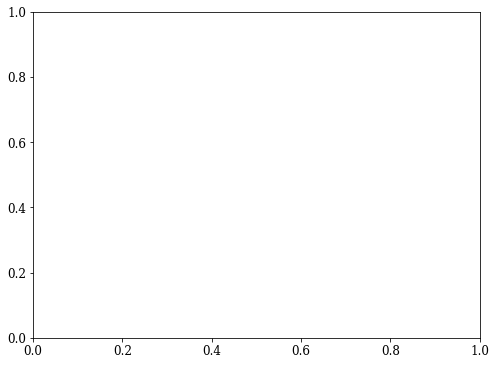

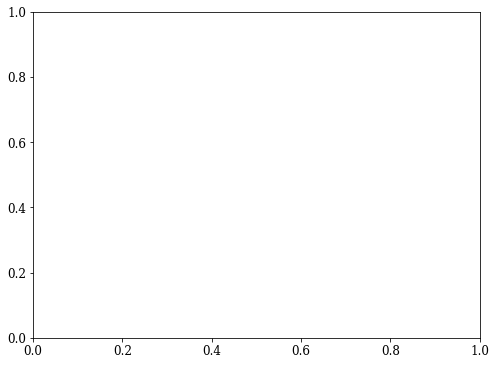

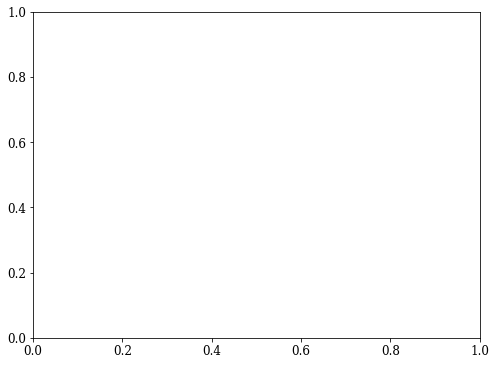

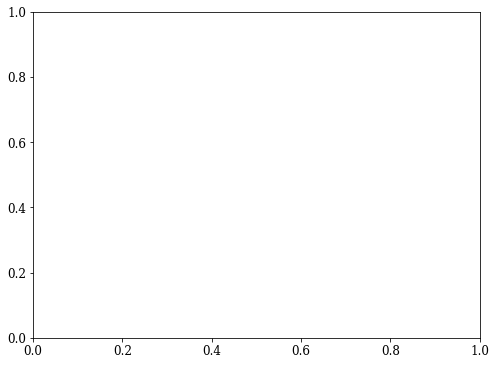

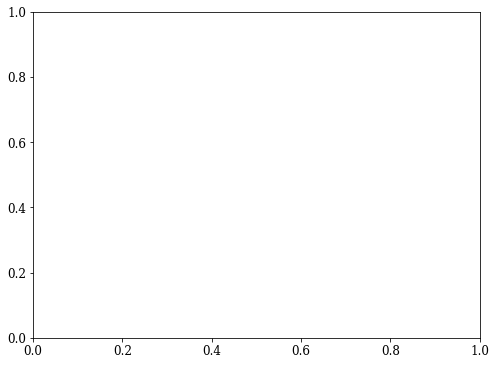

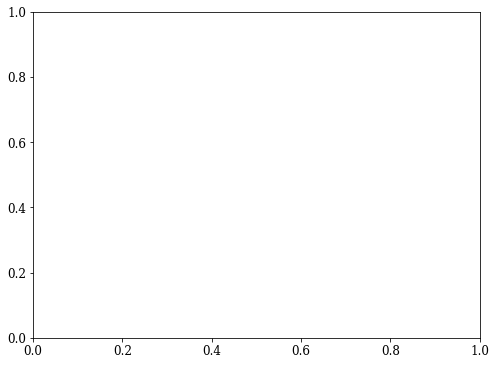

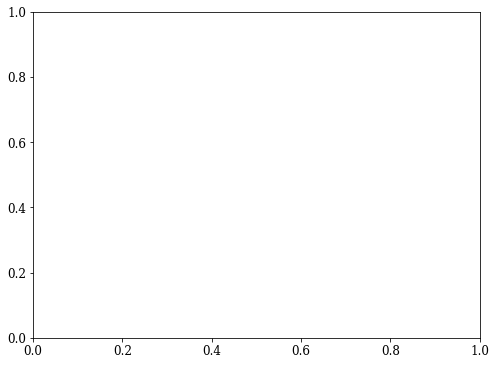

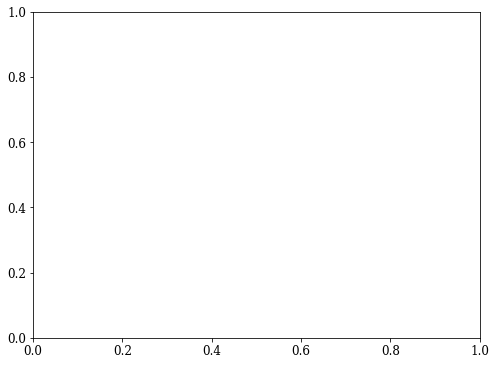

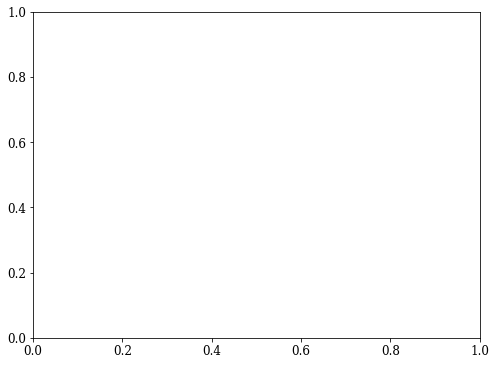

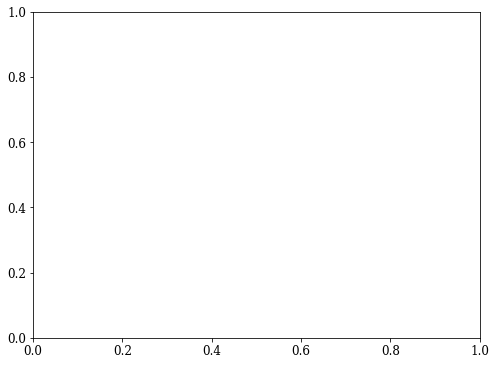

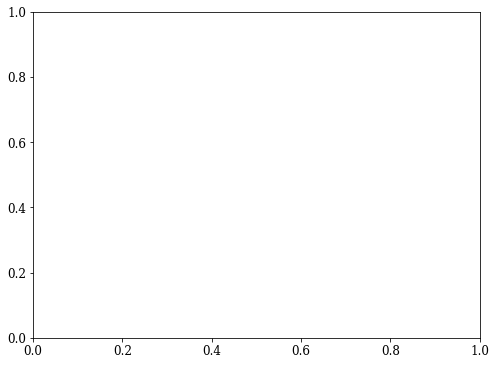

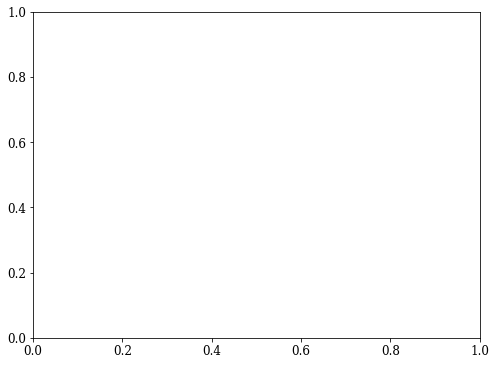

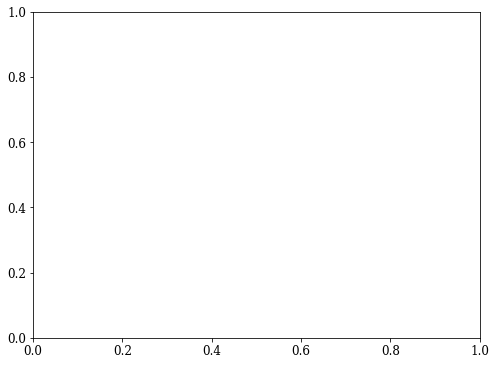

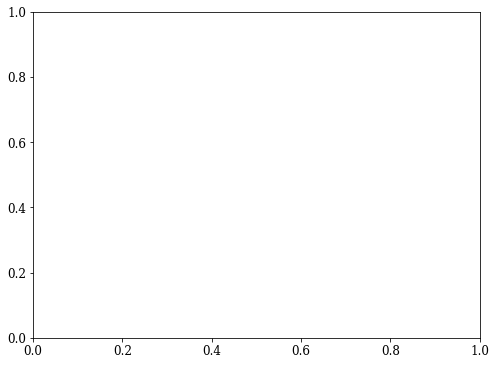

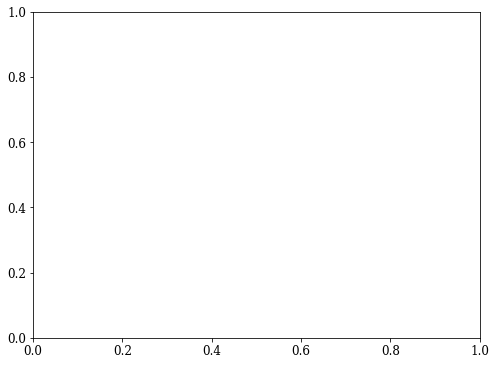

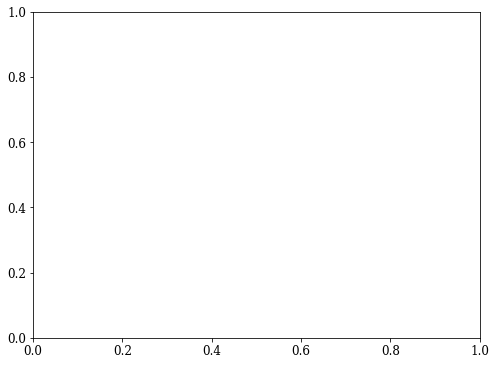

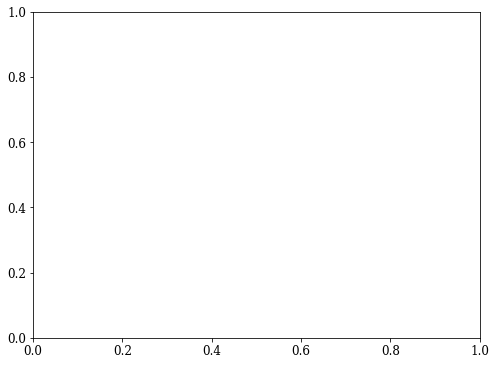

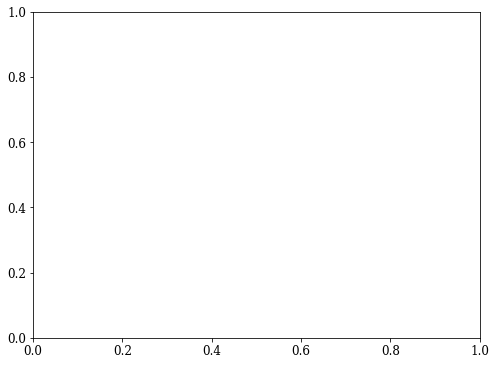

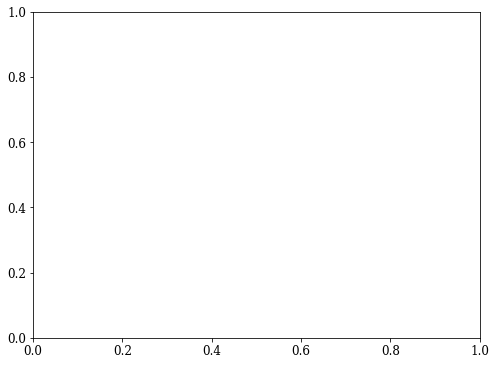

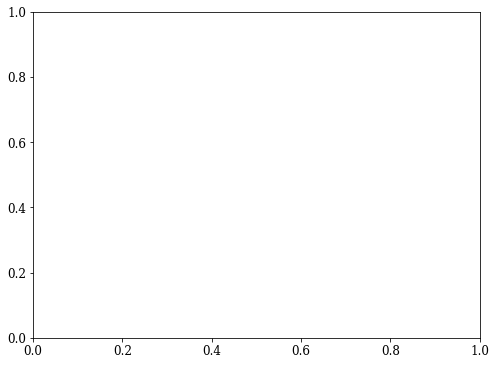

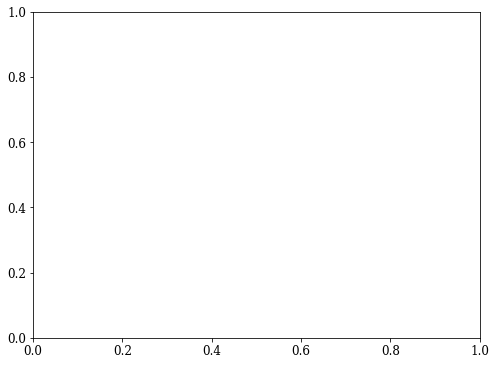

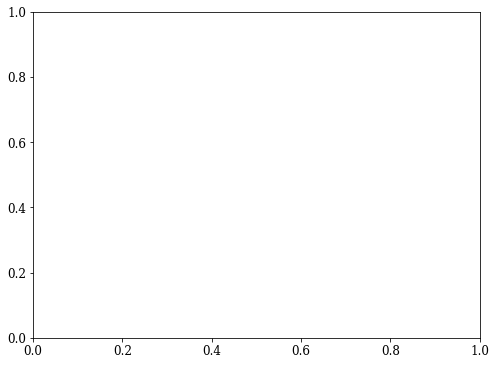

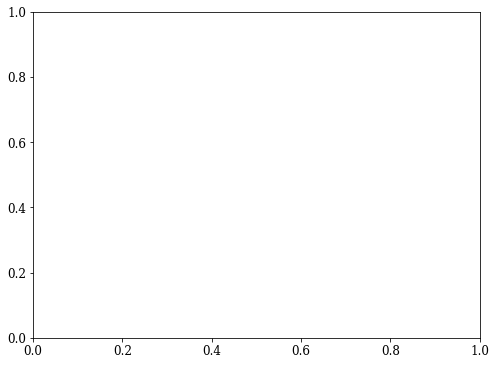

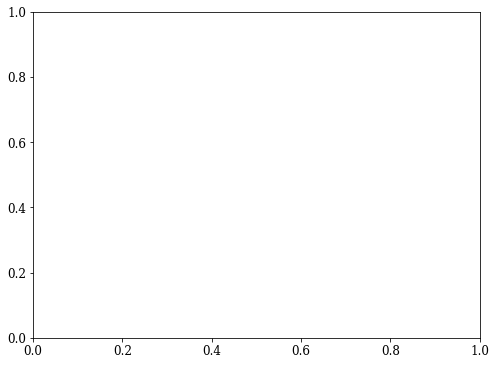

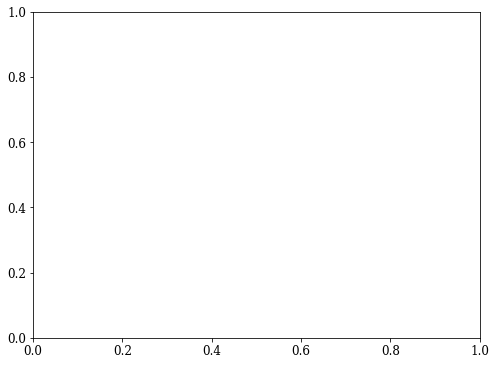

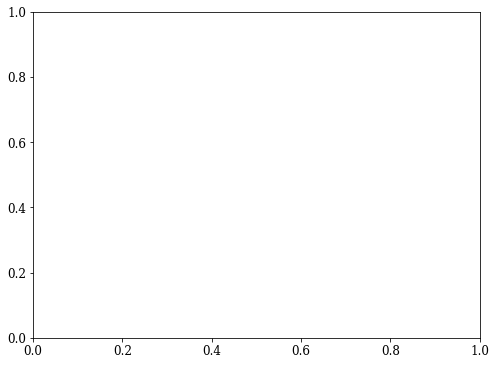

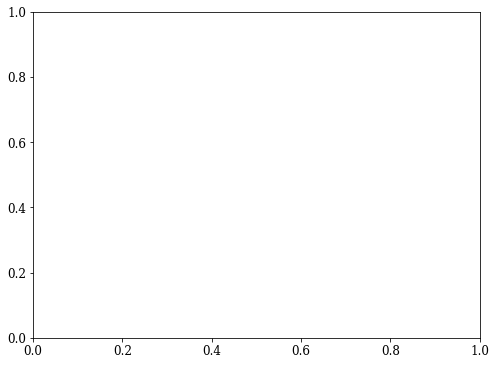

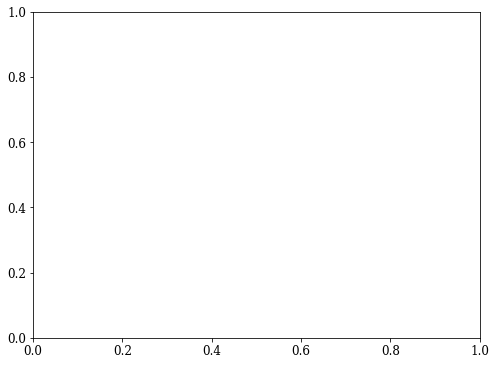

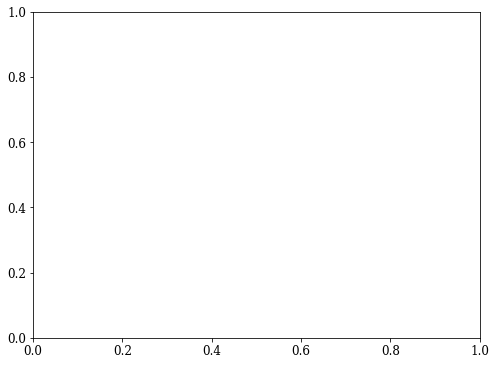

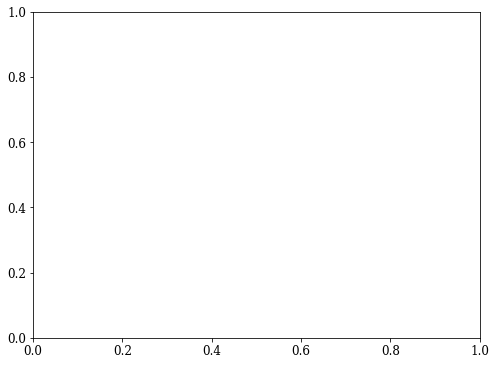

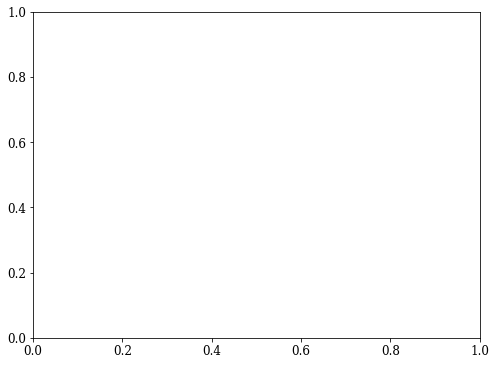

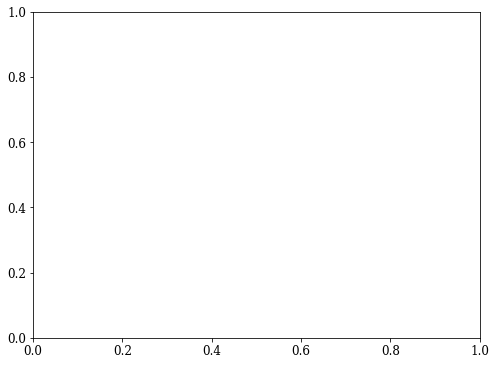

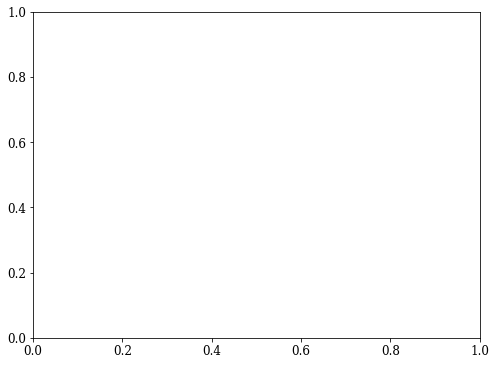

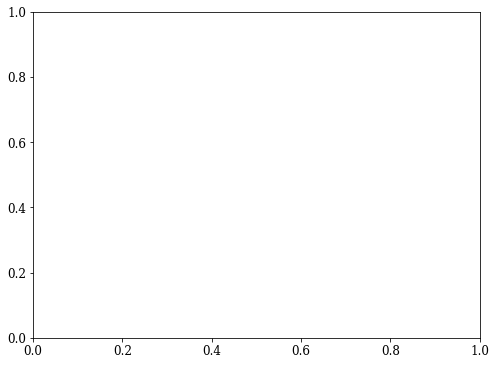

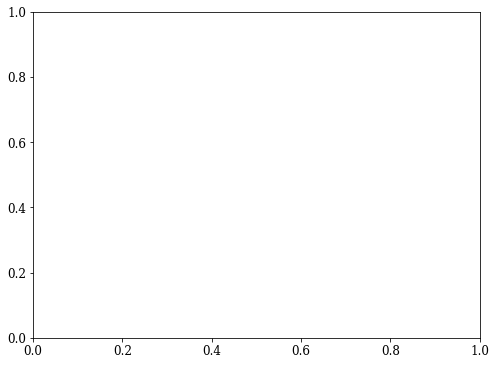

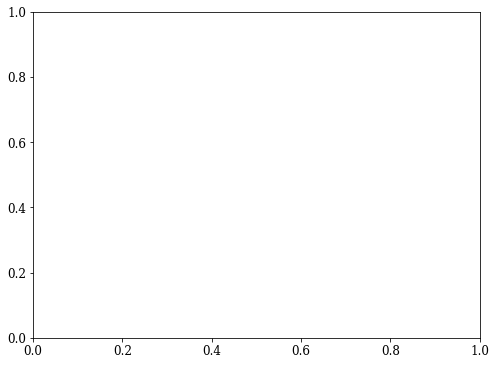

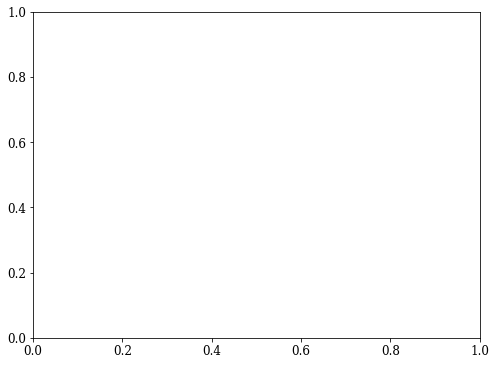

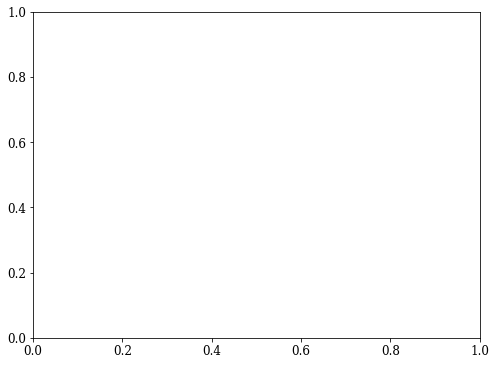

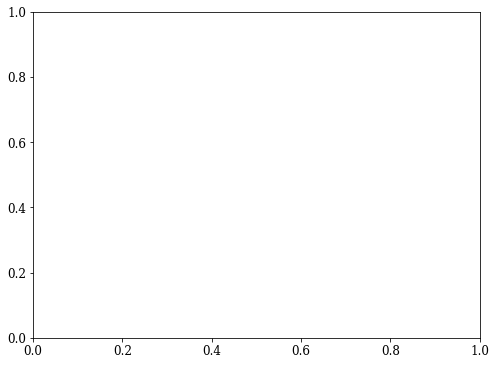

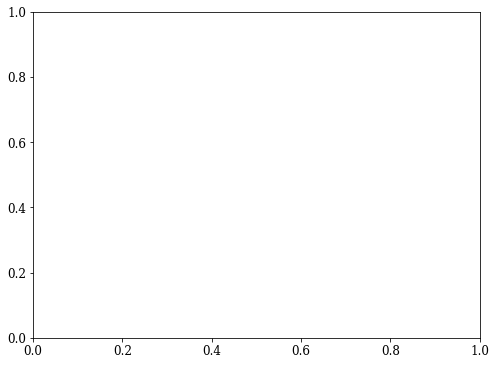

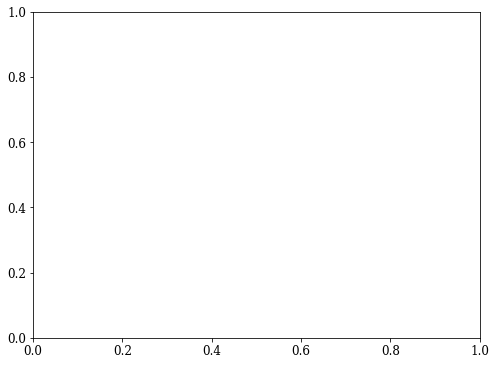

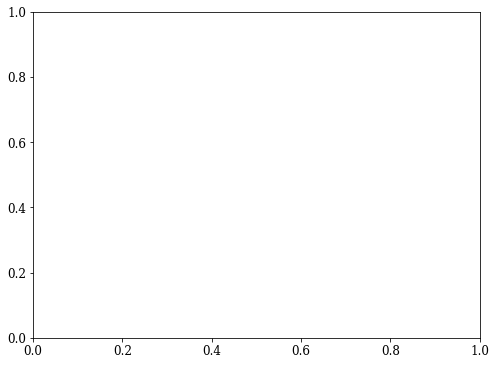

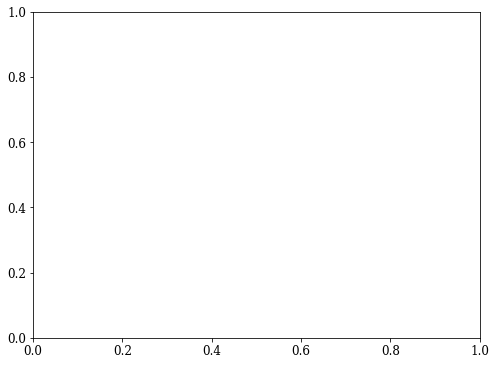

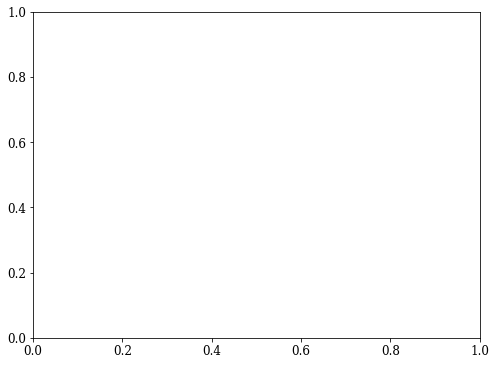

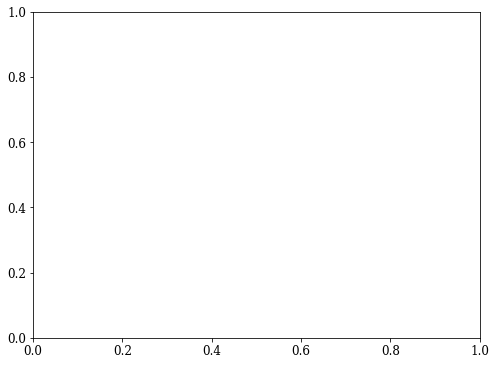

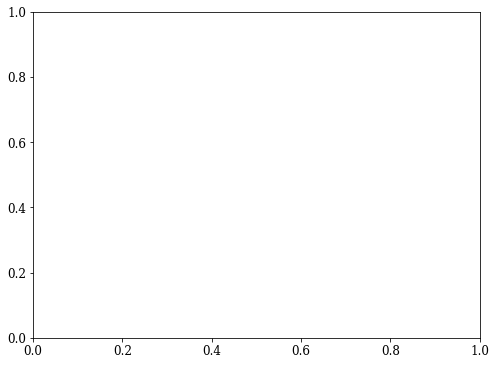

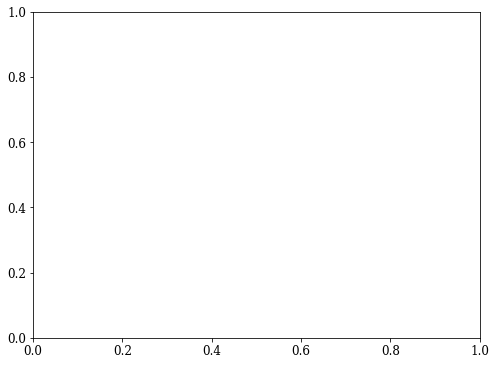

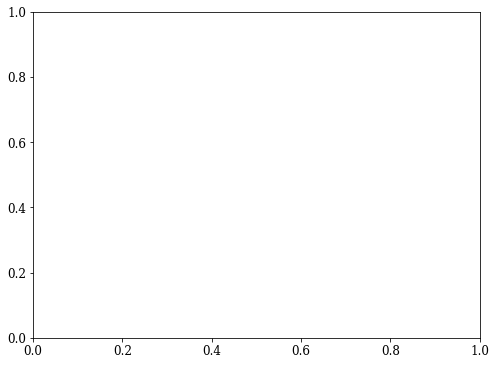

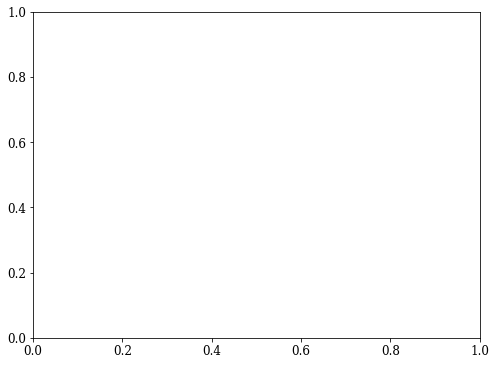

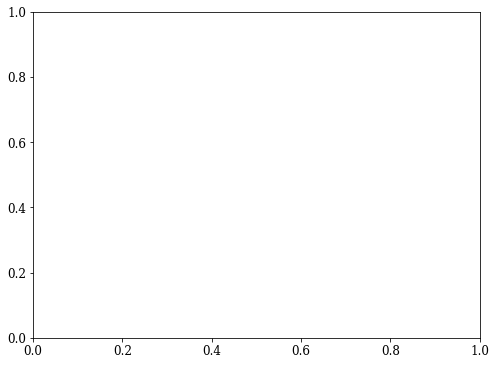

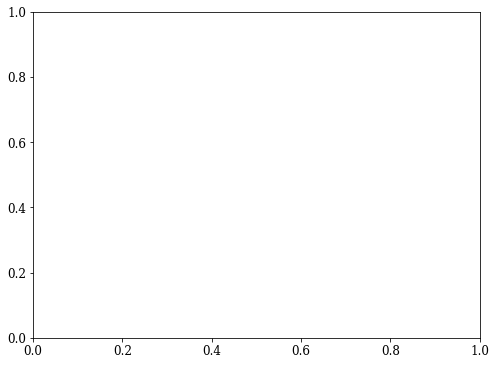

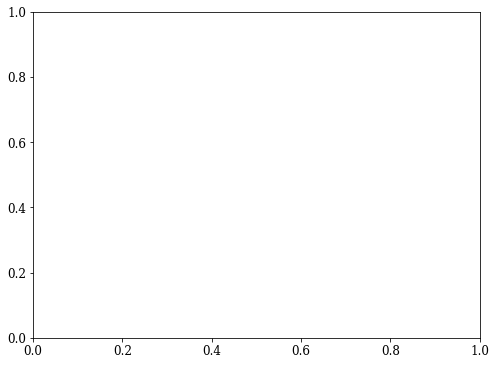

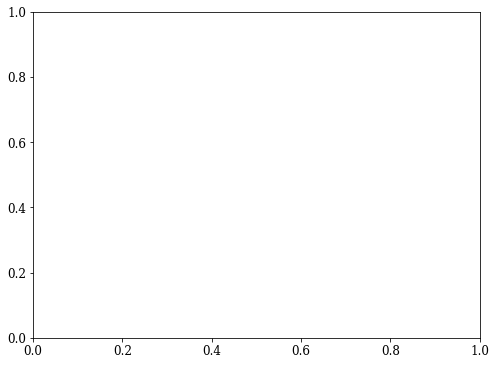

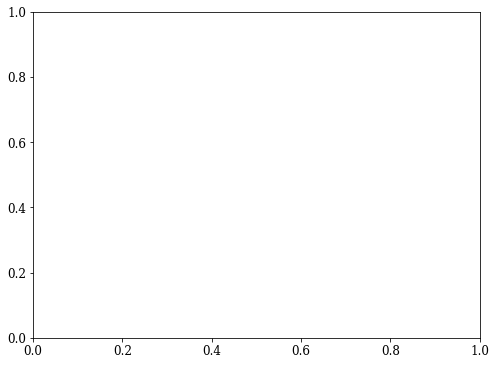

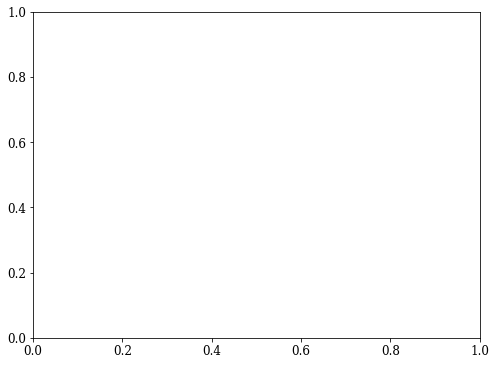

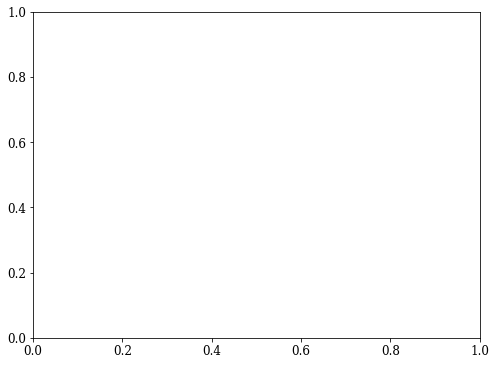

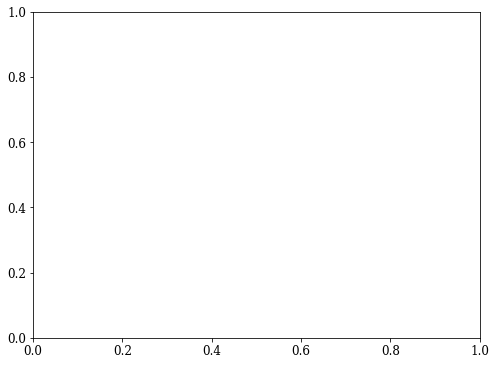

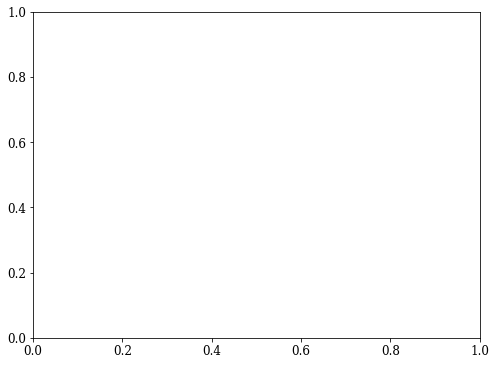

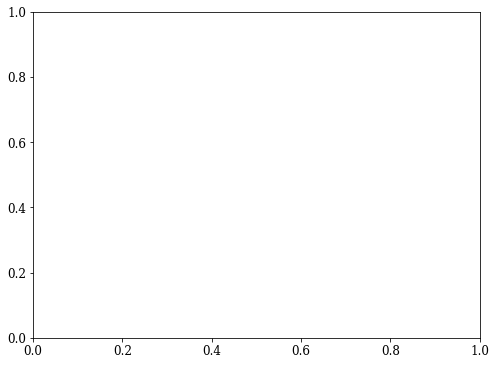

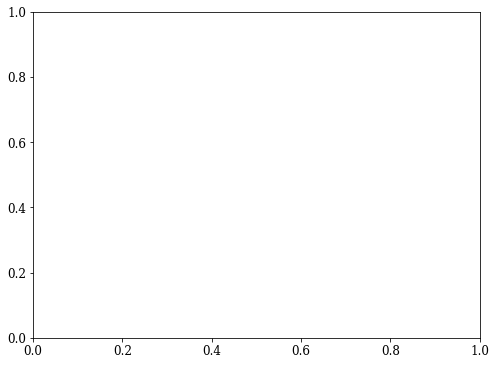

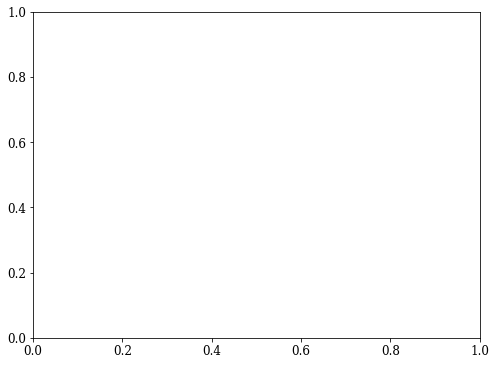

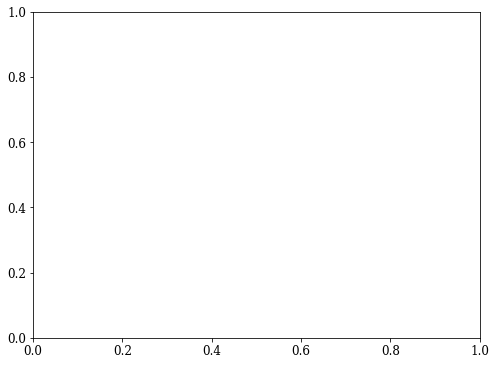

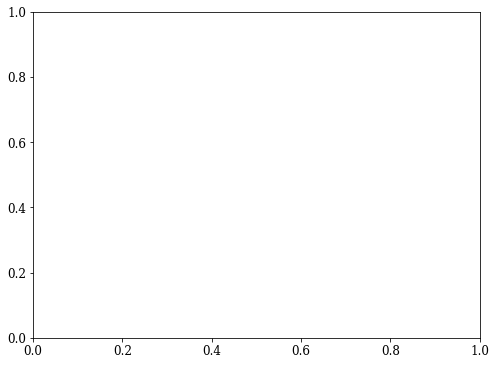

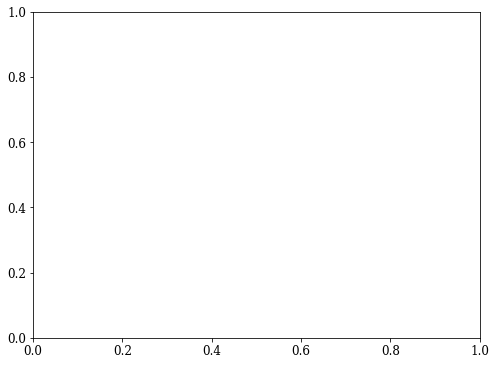

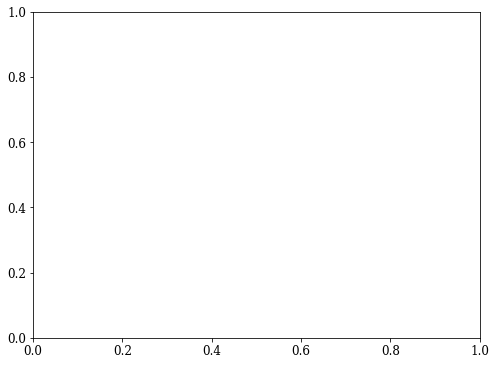

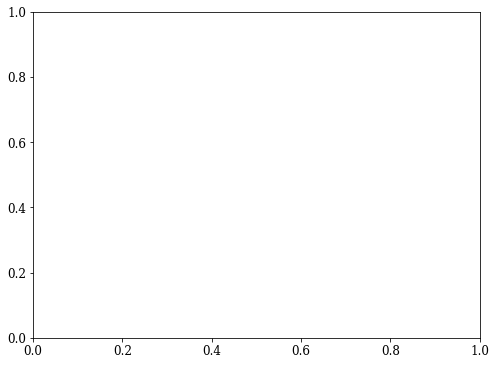

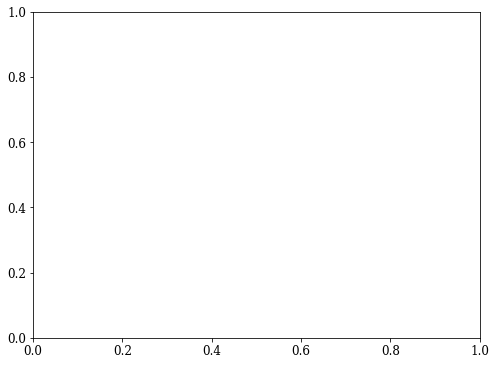

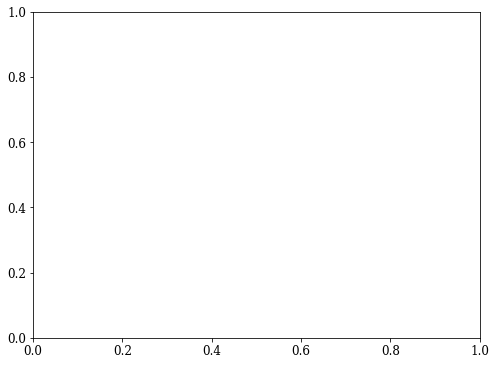

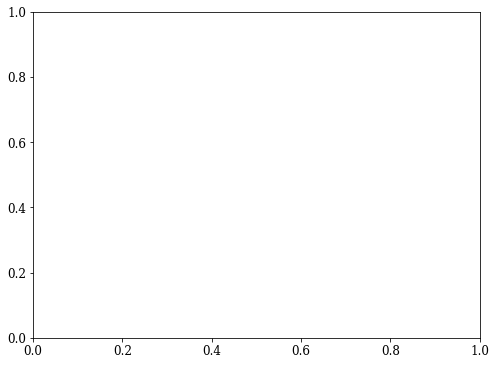

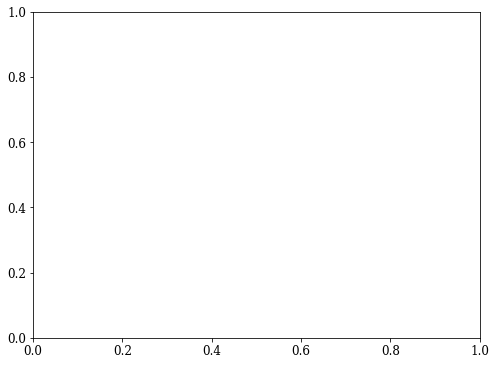

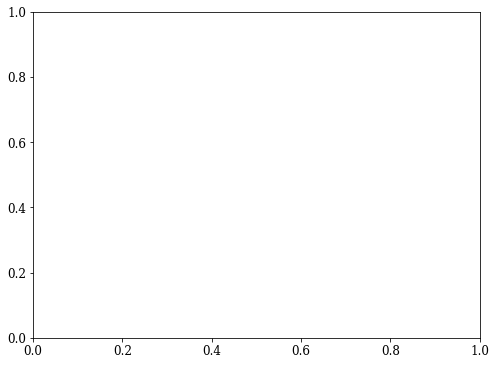

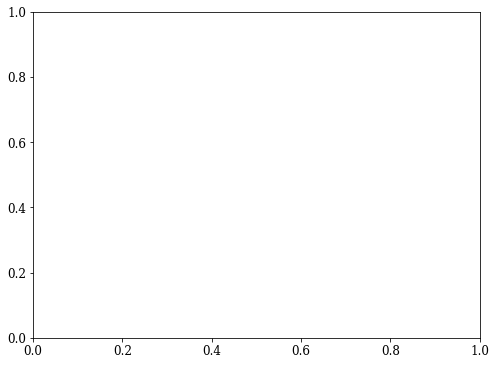

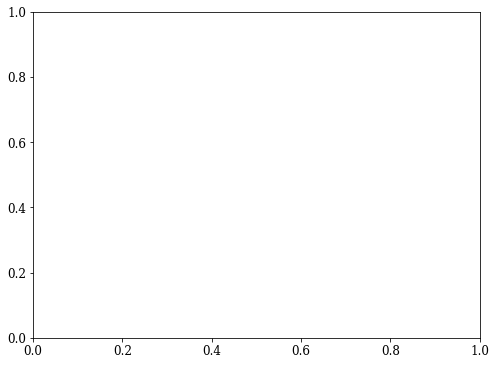

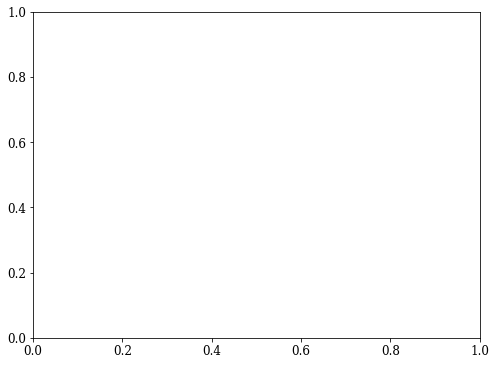

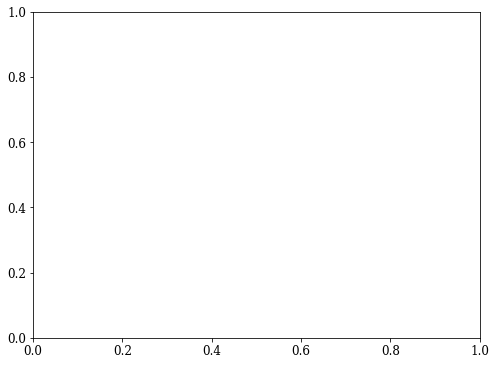

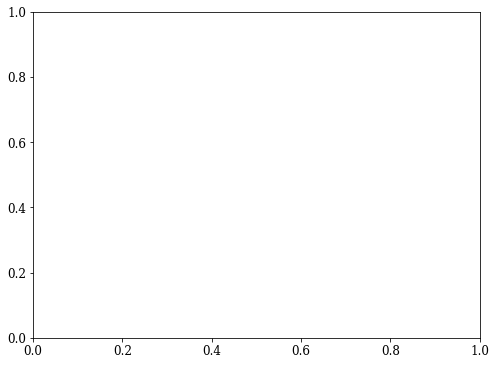

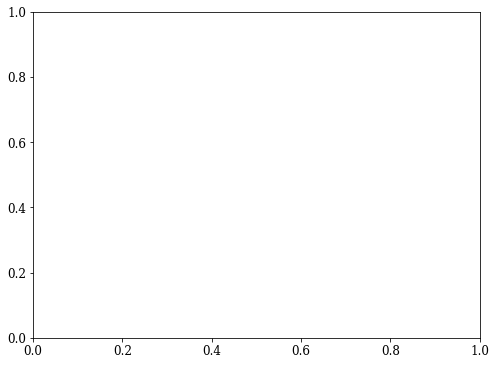

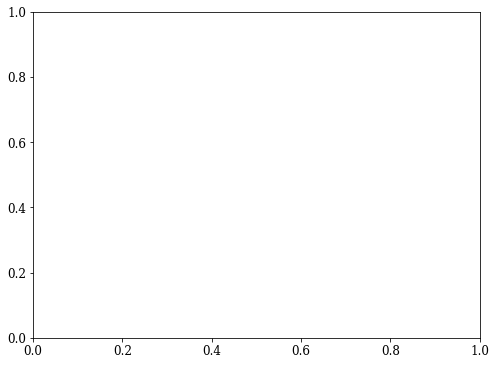

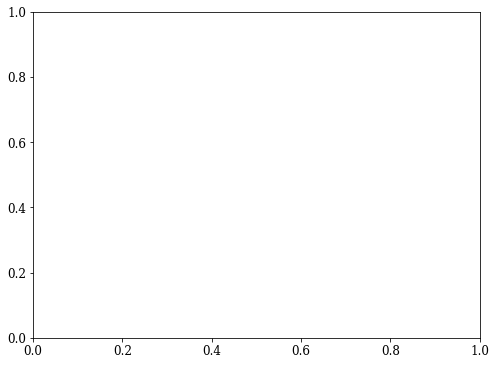

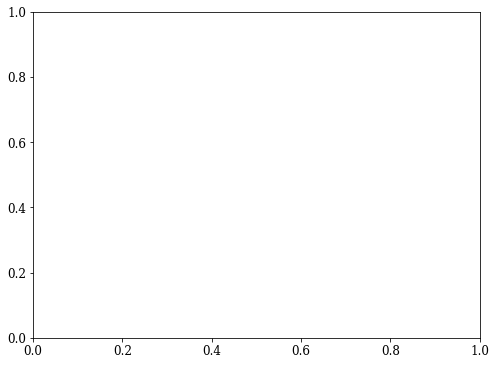

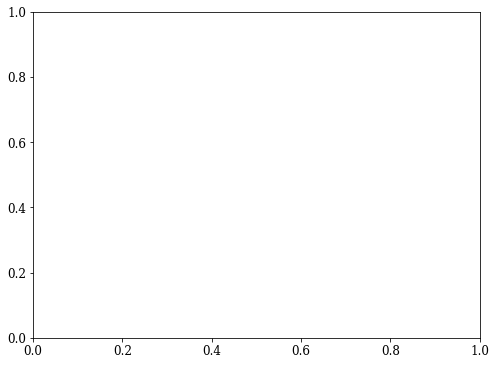

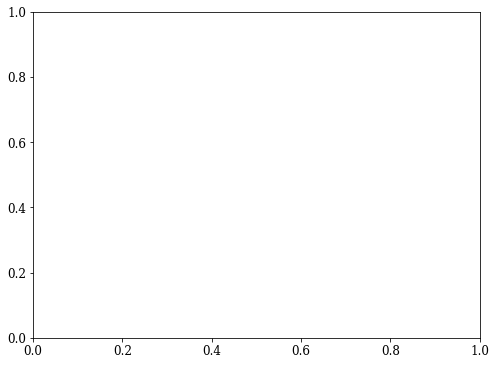

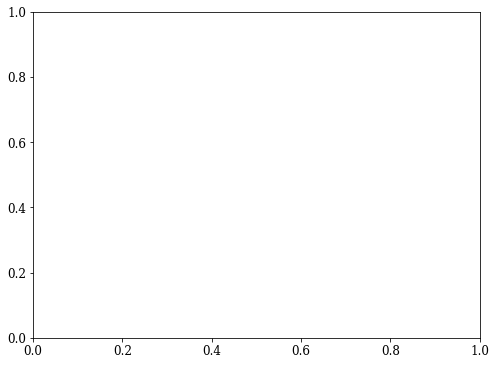

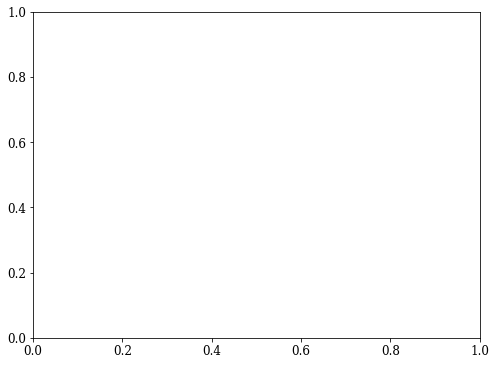

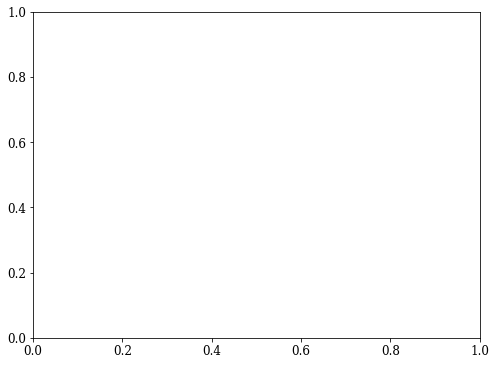

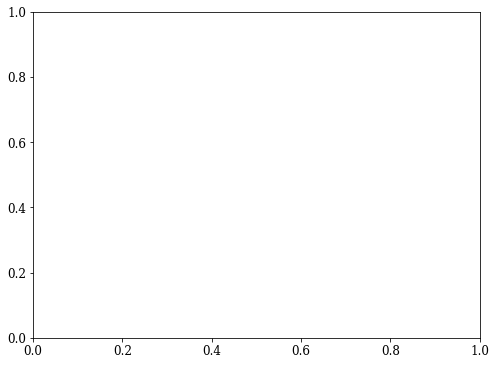

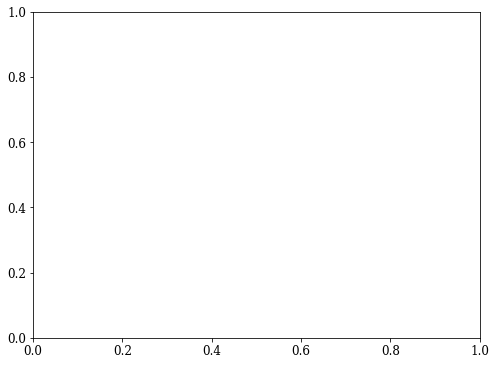

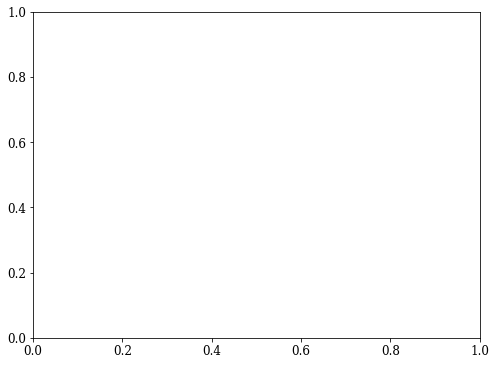

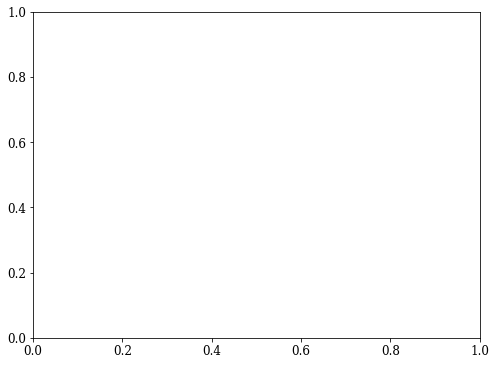

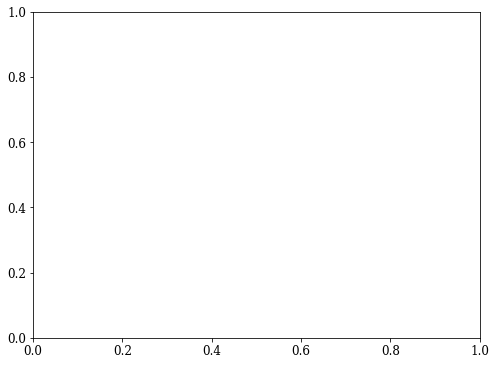

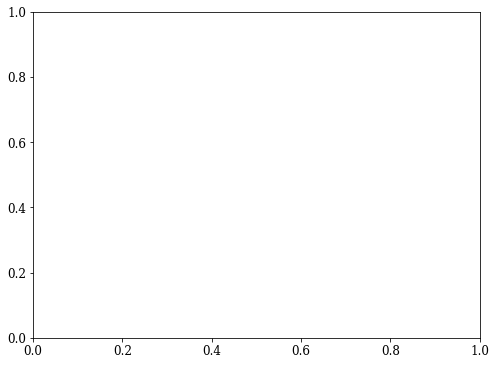

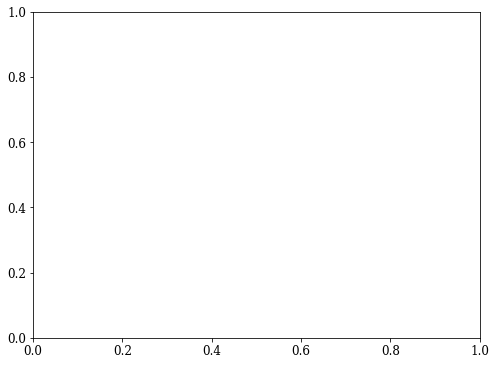

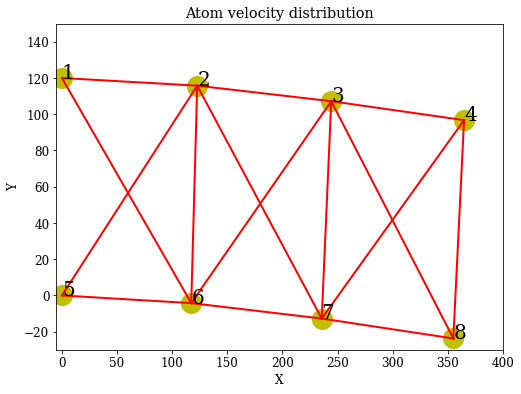

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (8,6)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
import time
from mpl_toolkits import mplot3d
#%matplotlib notebook
from matplotlib.animation import FuncAnimation

E = 1e4
A = 0.111

nodes = []
bars = []

### Nodes

cas = 2 # 2 ou 3
    

if cas == 3 : 
    h = 10
    H = 40

    nodes.append([0,0,0])
    nodes.append([1,0,0])
    nodes.append([1,1,0])
    nodes.append([0,1,0])

    nodes.append([0,0,h])
    nodes.append([1,0,h])
    nodes.append([1,1,h])
    nodes.append([0,1,h])

    nodes.append([0.5,0.5,H])

    ### Bars
    #socle 1
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([3,0])
    #socle 2
    bars.append([4,5])
    bars.append([5,6])
    bars.append([6,7])
    bars.append([7,4])
    #connection 1
    bars.append([0,4])
    bars.append([1,5])
    bars.append([2,6])
    bars.append([3,7])
    #connection 2
    bars.append([4,8])
    bars.append([5,8])
    bars.append([6,8])
    bars.append([7,8])
    #renforcement
    bars.append([0,5])
    bars.append([1,6])
    bars.append([2,7])
    bars.append([3,4])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[8,2] = 5

    # support displacement
    Ur = [0,0,0,0,0,0,0,0,0,0,0,0]

    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[1,:] = 0
    DOFCON[2,:] = 0
    DOFCON[3,:] = 0
    DOFCON[4,:] = 0
    
elif cas == 2 :
    nodes.append([0,120])
    nodes.append([120,120])
    nodes.append([240,120])
    nodes.append([360,120])
    nodes.append([0,0])
    nodes.append([120,0])
    nodes.append([240,0])
    nodes.append([360,0])
    
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([4,5])
    bars.append([5,6])
    bars.append([6,7])
    
    bars.append([5,1])
    bars.append([6,2])
    bars.append([7,3])
    
    bars.append([0,5])
    bars.append([4,1])
    bars.append([1,6])
    bars.append([5,2])
    bars.append([2,7])
    bars.append([6,3])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[7,1] = -10

    # support displacement
    Ur = [0,0,0,0]
    
    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[4,:] = 0
elif cas == 1 :
    a = 1
    ### Nodes
    nodes.append([0,0])
    nodes.append([a,0])
    nodes.append([a/2,np.sqrt(3)/2*a])
    ### Bars
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,0])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[2,0] = 10

    # support displacement
    Ur = [0,0, 0, 0]
    
    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[1,:] = 0
elif cas == 4 : #Chassis 3D
    #front buckhead
    nodes.append([0.050,0.180,-0.057])
    nodes.append([0,0.360,0])
    nodes.append([0,0.360,0.360])
    nodes.append([0,0,0.360])
    
    nodes.append([377.614,])
    
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([3,0])
    bars.append([0,2])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
elif cas == 5 : #Chassis 2D
    #front buckhead
    nodes.append([0,0])
    nodes.append([0,0.2])
    nodes.append([0.4,0])
    nodes.append([0.4,0.2])
    nodes.append([0.4,0.3])
    nodes.append([1.1,0])
    nodes.append([1.1,0.3])
    nodes.append([1.1,1.6])
    nodes.append([1.5,0])
    nodes.append([1.5,0.4])
    
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([3,4])
    bars.append([1,4])
    bars.append([1,3])
    bars.append([3,4])
    bars.append([3,4])
    bars.append([0,2])
    bars.append([2,4])
    bars.append([5,6])
    bars.append([5,8])
    bars.append([8,9])
    bars.append([6,7])
    bars.append([7,9])
    bars.append([6,9])
    bars.append([3,6])
    bars.append([2,5])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[1,0] = 1000

    # support displacement
    Ur = [0,0,0,0]
    
    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[4,:] = 0

print("Nombre d'elements : ",len(bars))
print("Nombre de noeuds : ", len(nodes))

#plt.ion()
def plot3D(nodes,c,lt,lw,lg) : 
    fig = plt.figure(figsize=(8,6))
    #plt.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(bars)) :
        xi,xj = nodes[bars[i,0],0],nodes[bars[i,1],0]
        yi,yj = nodes[bars[i,0],1],nodes[bars[i,1],1]
        zi,zj = nodes[bars[i,0],2],nodes[bars[i,1],2]
        line, = ax.plot([xi,xj],[yi,yj],[zi,zj],color = c, lw = lw, linestyle = lt)
        line.set_label(lg)
        #plt.draw()
        #fig.canvas.draw()
        #plt.pause(0.1)
        #ax.cla()
        #fig.canvas.flush_events()
    ax.set_title("Structure")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1,1,1])
    geom3D(nodes,ax)
    
def plot2D(nodes,c,lt,lw,lg) : 
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    for i in range(len(bars)) :
        xi,xj = nodes[bars[i,0],0],nodes[bars[i,1],0]
        yi,yj = nodes[bars[i,0],1],nodes[bars[i,1],1]
        line, = ax.plot([xi,xj],[yi,yj],color = c, lw = lw, linestyle = lt)
        line.set_label(lg)
        #plt.draw()
        #fig.canvas.draw()
        #plt.pause(0.1)
        #ax.cla()
        #fig.canvas.flush_events()
    ax.set_title("Atom velocity distribution")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    geom2D(nodes,ax)

def geom3D(NL,ax) : 
    x = [x for x in NL[:,0]]
    y = [y for y in NL[:,1]]
    z = [z for z in NL[:,2]]
    size = 400
    offset = size/4000.
    ax.scatter(x, y, z, c='y', s=size, zorder=1)
    for i, location in enumerate(zip(x,y)):
        #plt.annotate(i+1, (location[0]-offset, location[1]-offset), zorder=10)
        ax.text(x[i],y[i],z[i],str(i+1),size=20,zorder=2,color = "k")

def geom2D(NL,ax) : 
    x = [x for x in NL[:,0]]
    y = [y for y in NL[:,1]]
    size = 400
    offset = size/4000.
    ax.scatter(x, y, c='y', s=size, zorder=1)
    for i, location in enumerate(zip(x,y)):
        #plt.annotate(i+1, (location[0]-offset, location[1]-offset), zorder=10)
        ax.text(x[i],y[i],str(i+1),size=20,zorder=2,color = "k")
        
def truss_analyse(DOF,nodes,bars):
    NN = len(nodes)
    NE = len(bars)
    NDOF = DOF*NN
    d = nodes[bars[:,1],:] - nodes[bars[:,0],:]
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    a = np.concatenate((-angle.T,angle.T),axis=1)
    K = np.zeros([NDOF,NDOF])
    for k in range(NE) :
        aux = DOF*bars[k,:]
        index = np.r_[aux[0]:aux[0]+DOF,aux[1]:aux[1]+DOF]
        
        ES = np.dot(a[k][np.newaxis].T*E*A,a[k][np.newaxis]/L[k])
        K[np.ix_(index,index)] = K[np.ix_(index,index)] + ES
        
    #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")
    
    freeDOF = DOFCON.flatten().nonzero()[0]
    supportDOF = (DOFCON.flatten() == 0).nonzero()[0]
    #print(supportDOF)
    
    Kff = K[np.ix_(freeDOF,freeDOF)]
    Kfr = K[np.ix_(freeDOF,supportDOF)]
    Krf = Kfr.T
    Krr = K[np.ix_(supportDOF,supportDOF)]
    Pf = P.flatten()[freeDOF]
    Uf = np.linalg.solve(Kff,Pf)
    U = DOFCON.astype(float).flatten()
    U[freeDOF] = Uf
    U[supportDOF] = Ur
    U = U.reshape(NN,DOF)
    u = np.concatenate((U[bars[:,0]],U[bars[:,1]]),axis=1)
    N = E*A/L[:]*(a[:]*u[:]).sum(axis=1)
    R = (Krf[:]*Uf).sum(axis=1) + (Krr[:]*Ur).sum(axis=1)
    R = R.reshape(2*(DOF-1),DOF)
    return np.array(N),np.array(R),U

import os
import imageio

filenames = []
    
if cas == 2 :
    N, R, U = truss_analyse(2,nodes,bars)
    print("Axial Forces (positive = tension, negative = compression) :\n", N[np.newaxis].T)
    print("Reaction forces (positive = upward, negative = downward) : \n", R)
    print("Deformation at nodes \n", U)
    plot2D(nodes,'gray','--',1,'undeformed')
    scale = 1
    Dnodes = U*scale + nodes
    plot2D(Dnodes,'red','-',2,'deformed')
    #plt.show()
    #plt.savefig("Customized Surface Plot.png",dpi=300)
elif cas == 3 : 
    plot3D(nodes,'gray','--',1,'undeformed')
    N, R, U = truss_analyse(3,nodes,bars)
    print("Axial Forces (positive = tension, negative = compression) :\n", N[np.newaxis].T)
    print("Reaction forces (positive = upward, negative = downward) : \n", R)
    print("Deformation at nodes \n", U)    
    scale = 1
    Dnodes = U*scale + nodes
    plot3D(Dnodes,'red','-',2,'deformed')
elif cas == 1 :
    plot2D(nodes,'gray','--',1,'undeformed')
    N, R, U = truss_analyse(2,nodes,bars)
    print("Axial Forces (positive = tension, negative = compression) :\n", N[np.newaxis].T)
    print("Reaction forces (positive = upward, negative = downward) : \n", R)
    print("Deformation at nodes \n", U)
    plot2D(nodes,'gray','--',1,'undeformed')
    scale = 1
    Dnodes = U*scale + nodes
    plot2D(Dnodes,'red','-',2,'deformed')
elif cas == 4 :
    plot3D(nodes,'gray','--',1,'undeformed')
elif cas == 5 :
    plot2D(nodes,'gray','--',1,'undeformed')
    N, R, U = truss_analyse(2,nodes,bars)
    print("Axial Forces (positive = tension, negative = compression) :\n", N[np.newaxis].T)
    print("Reaction forces (positive = upward, negative = downward) : \n", R)
    print("Deformation at nodes \n", U)
    scale = 1
    Dnodes = U*scale + nodes
    plot2D(Dnodes,'red','-',2,'deformed')
    
import msvcrt

while 0:
    print('Testing..')
    # body of the loop ...
    if msvcrt.kbhit():
        if ord(msvcrt.getch()) == 27:
            break

gif = 1

if gif == 1 :
    path = np.linspace(nodes,U*scale + nodes,100)

    print(path.size)

    for i in range(len(path)):
        plt.cla()
        plot2D(path[i],'red','-',2,'deformed')
        plt.xlim(-5, 400)
        plt.ylim(-30, 150)
        # create file name and append it to a list
        filename = f'{i}.png'
        filenames.append(filename)

        # save frame
        plt.savefig(filename)
        #plt.close()

    #print(path)
        # build gif
    with imageio.get_writer('mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)

## Sources :
- 2D : https://www.youtube.com/watch?v=Y-ILnLMZYMw
- 3D : https://www.youtube.com/watch?v=9U-j1HxchXE